<a href="https://colab.research.google.com/github/shahchayan9/EDA/blob/main/Time_Series_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('city_temperature.csv')
df.drop(columns=['State'], inplace=True)  # Drop unused column
df.dropna(inplace=True)

In [4]:
city_data = df[(df['City'] == 'New York') & (df['Country'] == 'United States')]
print(city_data.shape)

(0, 7)


In [5]:
# Try with data for a different country, or without filtering by country
all_data = df[df['AvgTemperature'] > -50]  # Apply temperature filter without country filtering

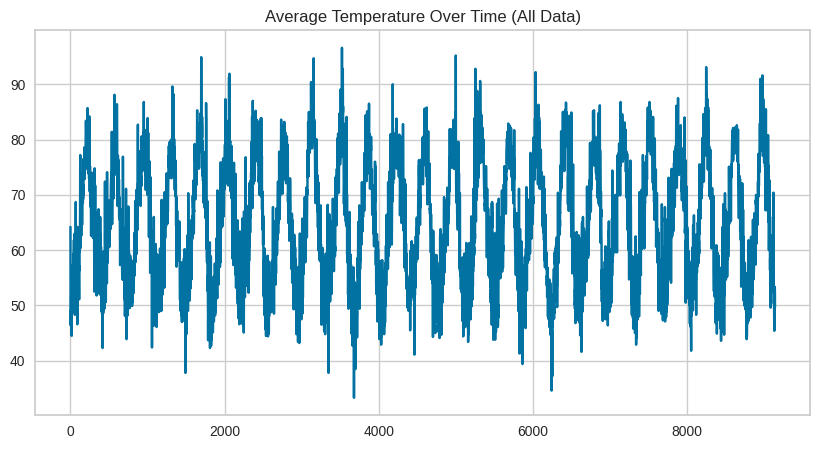

In [6]:
all_data['AvgTemperature'].plot(figsize=(10, 5), title='Average Temperature Over Time (All Data)')
plt.show()

In [7]:
city_data['Date'] = pd.to_datetime(city_data[['Year', 'Month', 'Day']], errors='coerce')
city_data.set_index('Date', inplace=True)


In [8]:
city_data['Month'] = city_data.index.month
city_data['DayOfWeek'] = city_data.index.dayofweek
city_data['Temp_Lag1'] = city_data['AvgTemperature'].shift(1)
city_data['Temp_Lag7'] = city_data['AvgTemperature'].shift(7)
city_data.dropna(inplace=True)

In [9]:
# Broaden to all data without specific filtering
city_data = df[df['AvgTemperature'] > -50]  # Apply only the temperature filter
city_data['Date'] = pd.to_datetime(city_data[['Year', 'Month', 'Day']], errors='coerce')
city_data.set_index('Date', inplace=True)


In [10]:
print(city_data.shape)

(9108, 7)


In [11]:
from pycaret.regression import *

setup(data=city_data, target='AvgTemperature', session_id=123, html=False)
best_model_ts = compare_models()
tuned_model_ts = tune_model(best_model_ts)
final_model_ts = finalize_model(tuned_model_ts)

                    Description             Value
0                    Session id               123
1                        Target    AvgTemperature
2                   Target type        Regression
3           Original data shape         (9108, 7)
4        Transformed data shape         (9108, 7)
5   Transformed train set shape         (6375, 7)
6    Transformed test set shape         (2733, 7)
7              Numeric features                 3
8          Categorical features                 3
9                    Preprocess              True
10              Imputation type            simple
11           Numeric imputation              mean
12       Categorical imputation              mode
13     Maximum one-hot encoding                25
14              Encoding method              None
15               Fold Generator             KFold
16                  Fold Number                10
17                     CPU Jobs                -1
18                      Use GPU             False


                                    Model      MAE       MSE     RMSE      R2  \
rf                Random Forest Regressor   2.4582   11.0858   3.3255  0.9052   
et                  Extra Trees Regressor   2.6123   12.5040   3.5330  0.8930   
xgboost         Extreme Gradient Boosting   2.7807   13.5376   3.6770  0.8841   
lightgbm  Light Gradient Boosting Machine   2.9096   14.8043   3.8451  0.8733   
gbr           Gradient Boosting Regressor   3.1447   17.1068   4.1338  0.8535   
dt                Decision Tree Regressor   3.0332   17.5403   4.1849  0.8498   
knn                 K Neighbors Regressor   3.3046   18.5242   4.3012  0.8414   
ada                    AdaBoost Regressor   3.7949   23.4681   4.8423  0.7991   
omp           Orthogonal Matching Pursuit   8.6521  105.4300  10.2657  0.0972   
ridge                    Ridge Regression   8.6503  105.4604  10.2671  0.0970   
lar                Least Angle Regression   8.6503  105.4604  10.2671  0.0970   
lr                      Line

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.1576  17.2615  4.1547  0.8507  0.0668  0.0507
1     2.9094  13.9808  3.7391  0.8751  0.0595  0.0466
2     3.0128  15.0658  3.8815  0.8628  0.0611  0.0476
3     3.3366  19.0411  4.3636  0.8412  0.0694  0.0535
4     3.2017  16.7775  4.0960  0.8522  0.0655  0.0516
5     3.2152  17.6840  4.2052  0.8571  0.0661  0.0514
6     3.1718  17.2750  4.1563  0.8517  0.0651  0.0509
7     3.0889  16.1662  4.0207  0.8680  0.0637  0.0497
8     3.0905  15.7704  3.9712  0.8592  0.0644  0.0506
9     3.2141  16.3421  4.0425  0.8672  0.0651  0.0522
Mean  3.1399  16.5364  4.0631  0.8585  0.0647  0.0505
Std   0.1137   1.3482  0.1665  0.0095  0.0027  0.0020


In [12]:
predictions = predict_model(final_model_ts, data=city_data)
print(predictions.head())

                     Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  0.7895  1.1555  1.0749  0.9902  0.0173  0.0127
            Region  Country     City  Month  Day  Year  AvgTemperature  \
Date                                                                     
1995-01-01  Africa  Algeria  Algiers      1    1  1995       64.199997   
1995-01-02  Africa  Algeria  Algiers      1    2  1995       49.400002   
1995-01-03  Africa  Algeria  Algiers      1    3  1995       48.799999   
1995-01-04  Africa  Algeria  Algiers      1    4  1995       46.400002   
1995-01-05  Africa  Algeria  Algiers      1    5  1995       47.900002   

            prediction_label  
Date                          
1995-01-01         59.538998  
1995-01-02         51.029001  
1995-01-03         50.082000  
1995-01-04         47.247001  
1995-01-05         47.631001  
